## Reynolds average thickness flux

The time average $\overline{ h_k{\bf v}_k }$ can be decomposed into i) a contribution from the time mean thickness ($\overline{h}_k$) and flow ($\overline{\bf v}_k$); and ii) and the rest which is known as the Reynolds flux, $\overline{h'_k{\bf v}'_k}$.

For a variable $\phi(t)$, and scalar constant $a$, let
$$
\phi' = \phi(t) - \overline{ \phi }
$$
so that
$$
\overline{ \phi' } = 0
$$
and
$$
\overline{ a \phi' } = a \overline{ \phi' }
$$
then
\begin{eqnarray}
\overline{ h_k {\bf v}_k }
& = & \overline{ ( \overline{h}_k + h'_k ) ( \overline{\bf v}_k + {\bf v}'_k ) } \\
& = & \overline{ \overline{h}_k \overline{\bf v}_k + \overline{h}_k {\bf v}'_k + h'_k \overline{\bf v}_k + h'_k {\bf v}'_k } \\
& = & \overline{ h_k } \overline{ {\bf v}_k } + \overline{ h'_k {\bf v}'_k }
\end{eqnarray}

Thus we can diagnose the Reynolds flux from the time averages $\overline{h}_k$, $\overline{\bf v}_k$ and $\overline{ h_k {\bf v}_k }$:
$$
\overline{ h'_k {\bf v}'_k } = \overline{ h_k {\bf v}_k } - \overline{h}_k \overline{\bf v}_k
$$

- Diagnose the two components of $\overline{ h'_k {\bf v}'_k }$ from the diagnostics $\overline{ h_k u_k }$, $\overline{h}_k$, $\overline{u}_k$, $\overline{ h_k v_k }$, $\overline{h}_k$ and $\overline{v}_k$.
- Plot $\nabla \cdot \overline{ h'_k {\bf v}'_k }$, $\nabla \cdot \overline{ h_k } \overline{ {\bf v}_k }$ and verify that $\overline{\partial_t h_k} = - \nabla \cdot \overline{ h'_k {\bf v}'_k } - \nabla \cdot \overline{ h_k } \overline{ {\bf v}_k }$.

- $\overline{h}$, $\overline{v}$, $\overline{u}$ are in the ave_prog.nc file
- $\overline{hu}$, $\overline{hv}$ are in continuity.nc

$$\overline{ h_k {\bf v}_k} = \overline{ h_k } \overline{ {\bf v}_k } + \overline{ h'_k {\bf v}'_k }$$
$$\overline{\partial_t h_k} = - \nabla \cdot \overline{ h'_k {\bf v}'_k } - \nabla \cdot \overline{ h_k } \overline{ {\bf v}_k }$$
$$\overline{\partial_t h_k} = - \nabla \cdot \overline{ h'_k {\bf v}'_k } - \nabla \cdot (\overline{ h_k  {\bf v}_k } - \overline{ h'_k {\bf v}'_k })$$
$$\overline{\partial_t h_k} = -\nabla \cdot \overline{ h_k {\bf v}_k}$$
Isn't this the same as what we have in notebook 21 except with averages?

In [28]:
%pylab inline
import netCDF4
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
from netCDF4 import Dataset
snapshots = Dataset('200x200x5000days/snapshot.nc', "r", format="NetCDF4")
ave = Dataset('200x200x5000days/ave_prog.nc', "r", format="NetCDF4")
continuity = Dataset('200x200x5000days/continuity.nc', "r", format="NetCDF4")
ocean_geom = Dataset('200x200x5000days/ocean_geometry.nc', "r", format="NetCDF4")

In [84]:
for v in ave.variables:
    print(v)
    print(ave.variables[v])
    print()

xh
<class 'netCDF4._netCDF4.Variable'>
float64 xh(xh)
    long_name: h point nominal longitude
    units: degrees_east
    cartesian_axis: X
unlimited dimensions: 
current shape = (200,)
filling off


yh
<class 'netCDF4._netCDF4.Variable'>
float64 yh(yh)
    long_name: h point nominal latitude
    units: degrees_north
    cartesian_axis: Y
unlimited dimensions: 
current shape = (200,)
filling off


Time
<class 'netCDF4._netCDF4.Variable'>
float64 Time(Time)
    long_name: Time
    units: days since 0001-01-01 00:00:00
    cartesian_axis: T
    calendar_type: JULIAN
    calendar: JULIAN
    bounds: Time_bnds
unlimited dimensions: Time
current shape = (10,)
filling off


nv
<class 'netCDF4._netCDF4.Variable'>
float64 nv(nv)
    long_name: vertex number
    units: none
    cartesian_axis: N
unlimited dimensions: 
current shape = (2,)
filling off


xq
<class 'netCDF4._netCDF4.Variable'>
float64 xq(xq)
    long_name: q point nominal longitude
    units: degrees_east
    cartesian_axis: X
un

In [120]:
h_bar = ave.variables['h']
v_bar = ave.variables['v']
u_bar = ave.variables['u']

uh_bar = continuity.variables['uh']
vh_bar = continuity.variables['vh']

In [32]:
ah = ocean_geom.variables['Ah']
ah

<class 'netCDF4._netCDF4.Variable'>
float64 Ah(lath, lonh)
    long_name: Area of h cells
    units: m2
unlimited dimensions: 
current shape = (200, 200)
filling off

In [38]:
v_bar

<class 'netCDF4._netCDF4.Variable'>
float32 v(Time, zl, yq, xh)
    long_name: Meridional velocity
    units: m s-1
    missing_value: 1e+20
    _FillValue: 1e+20
    cell_methods: zl:mean yq:point xh:mean time: mean
    time_avg_info: average_T1,average_T2,average_DT
    interp_method: none
unlimited dimensions: Time
current shape = (10, 2, 201, 200)
filling off

In [58]:
v_bar[1, 0, :, :].shape

(201, 200)

In [35]:
# div = h_bar[1, 0, :, 1:].filled(0) - h_bar[1, 0, :, :-1].filled(0) + (v_bar[1, 0, 1:, :].filled(0) - v_bar[1, 0, :-1, :].filled(0))

In [114]:
type(u_bar[0, 0, :, 1:].filled(0))

numpy.ndarray

### Unsure about slicing

Here, we decided to arbitrarily slice so that the dimensions would be `(200, 200)`, but is it okay to do that? We can't seem to take a difference over $x$ or $y$ this way.

In [126]:
div = u_bar[1, 0, :, 1:] - u_bar[1, 0, :, :-1] + (v_bar[1, 0, 1:, :] - v_bar[1, 0, :-1, :])

In [99]:
uh_bar;

In [100]:
vh_bar;

In [101]:
h_bar;

In [102]:
u_bar;

In [103]:
v_bar;

In [122]:
hb_ub = np.multiply(h_bar[0, 0, :, :], u_bar[0, 0, :, 1:].filled(0))

$\overline{h_k'u_k'}$ is `diff`

In [124]:
diff = uh_bar[0, 0, :, 1:].filled(0) - hb_ub

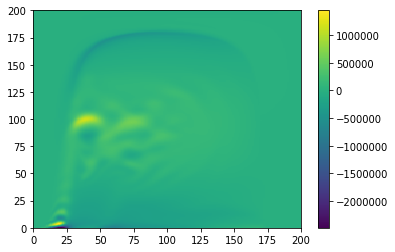

In [125]:
plt.pcolormesh(diff)
plt.colorbar()

In [97]:
delta_h = h_bar[1, 0, :, :] - h_bar[0, 0, :, :]
delta_t = (ave.variables['Time'][1] - ave.variables["Time"][0]) * 86400

In [71]:
time = ave.variables['Time']
time

<class 'netCDF4._netCDF4.Variable'>
float64 Time(Time)
    long_name: Time
    units: days since 0001-01-01 00:00:00
    cartesian_axis: T
    calendar_type: JULIAN
    calendar: JULIAN
    bounds: Time_bnds
unlimited dimensions: Time
current shape = (10,)
filling off

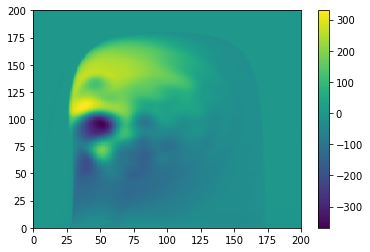

In [72]:
plt.pcolormesh(-delta_h * ah / delta_t)
plt.colorbar()

In [73]:
div_two = uh[1, 0, :, 1:].filled(0) - uh[1, 0, :, :-1].filled(0) + (vh[1, 0, 1:, :].filled(0) - vh[1, 0, :-1, :].filled(0))